# CAM - Class Activation Map

모델이 어떤 곳을 보고 어뜬 클래스임을 짐작하고 있는지 확인할 수 있는 지도

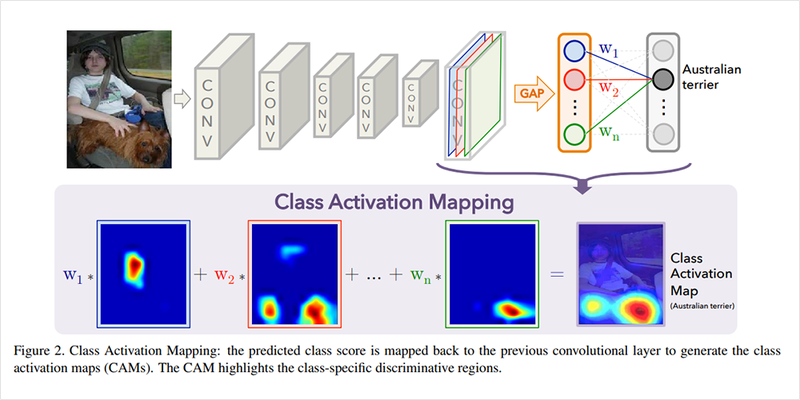

### 1. GAP (Global Average Pooling)

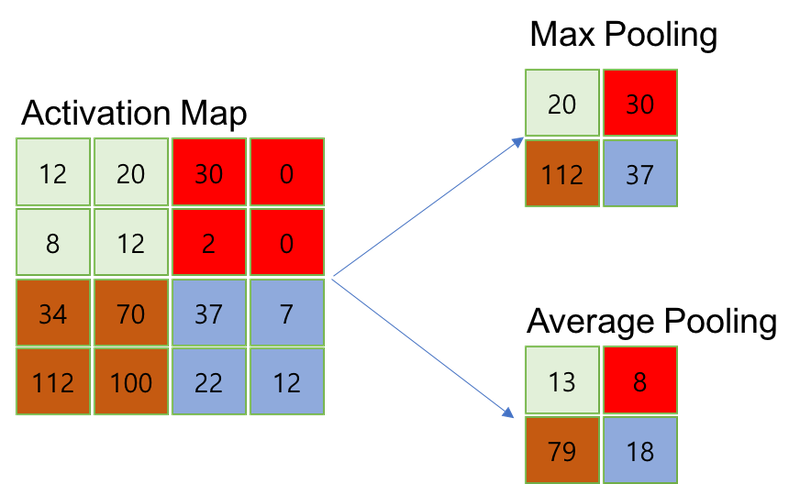

- 일반적으로 이미지 분류에서는 여러 CNN 레이어를 거쳐 특성을 추출한 후, 그 특성 맵을 flattening한 후 fully connected layer에 입력해 줌으로써 각 클래스에 따른 logit을 구하고 최종적으로 활성화 함수를 거치게 된다.
   
   
- 하지만 Network in Network 논문에서는 fully connected layer 대신 GAP 연산을 한다.
   
   
- 논문에서는 이렇게 하면 특성 맵의 각 채널이 클래스별 신뢰도를 나타내어 해석이 쉽고, fully connected layer와 달리 최적화할 파라미터가 존재하지 않아 과적합을 방지할 수 있다고 한다.

### 2. CAM

- GAP을 통해 각 채널별 정보를 요약하면 소프트맥스 레이어는 이 정보를 보고 각 클래스에 대한 개별 채널의 중요도를 결정한다. 이렇게 클래스별로 소프트맥스 레이어를 통해 각 채널의 가중합을 구하면 각 클래스가 활성화 맵의 어떤 부분을 주로 활성화 시키는지 확인할 수 있다.
   
   
- 이렇게 얻은 특성 맵은 CNN의 출력값 크기와 같게 된다. 이를 interpolation을 통해 적절히 원본 이미지 크기로 확대해주면 CAM을 얻을 수 있다.
   
   
- CAM의 경우 가장 마지막 CNN 레이어의 결과물만을 시각화할 수 있다.

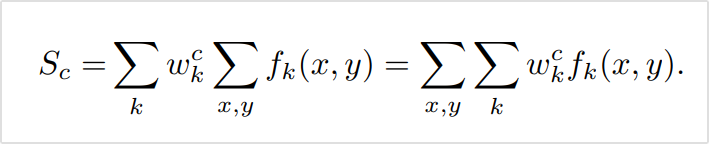

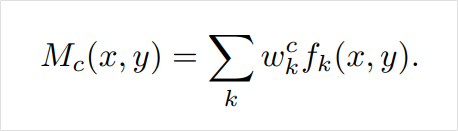

# Grad-CAM

- CAM의 제한되는 문제를 해결하고 다양한 모델의 구조를 해석할 수 있는 방법을 제안한다.
- Grad-CAM을 사용하면 CNN 기반의 네트워크는 굳이 모델 구조를 변경할 필요가 없고 분류 문제 외의 다른 테스크들에 유연하게 대처할 수 있다.

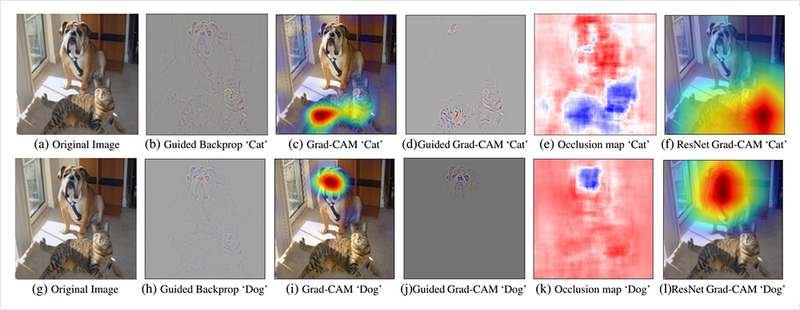

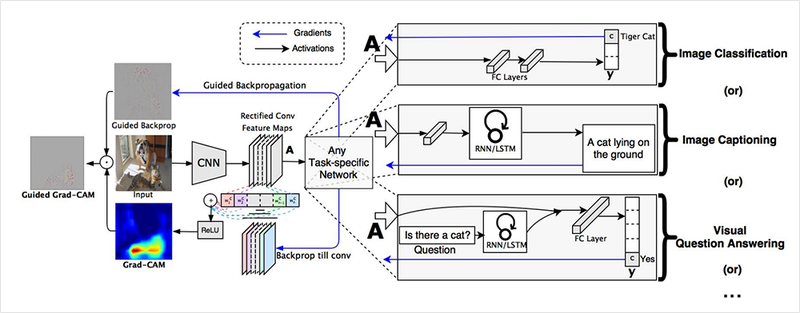

- 오른쪽의 'Image classification', 'Image captioning', 'Visual question answering' 이 Grad-CAM이 적용될 수 있는 다양한 컴퓨터 비전 문제들이다.

CAM에서는 소프트맥스를 가진 fully connected layer의 가중치를 통해서 어떤 클래스에 대한 각 채널의 중요도 또는 가중치를 얻었다면, Grad-CAM은 gradient를 사용한다.원하는 클래스에 대해서 관찰하는 레이어로 들어오는 그래디언트를 구할 수 있다면, 해당 클래스를 활성화할 때, 레이어의 특성 맵에서 어떤 채널이 중요하게 작용하는 지 알 수 있다.

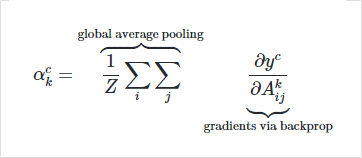

해당 식은 클래스에 대해서 backpropagagtion을 통해 얻은 k번째 채널의 그래디언트를 사용해 가중치 점수를 구하는 식이다. y는 모델의 출력값, A는 활성화 맵을 의미한다. Z는 전체 map의 크기이다.

그럼 활성화 맵에서 어떤 클래스의 위치에 따른 활성화를 보려면 어떻게 해야 하는가?   
Grad-CAM은 이를 위해 k번째 활성화 맵과 이 가중치를 곱해주어 합한 뒤 ReLU 활성화 함수를 통해서 클래스에 따른 Grad-CAM을 얻는다.

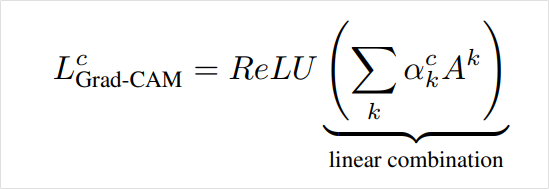

- ReLU를 사용함으로써 활성화된 영역을 확인해야 하기 때문에 불필요한 음의 값을 줄여줄 수 있다.

# ACoL - Adversarial Complementary Learning

CAM이 특정 부위에 집중해 학습하는 것을 막기 위해 ACoL은 브랜치를 두 가지로 두어 너무 높은 점수를 지워줌으로써 주변의 특성 또한 반영한다. 이러한 과정을 Adversial, 적대적인 학습방법이라고 한다.

결과적으로 기존 CAM이 활성화되는 부분과 달리 ACoL은 물체의 전반적인 영역으로 CAM이 활성화되는 효과를 확인할 수 있다.   
   
   
CAM에서는 CAM을 얻기 위해 대상이 되는 네트워크에 feed forward를 하고 활성화 맵과 가중치 계산을 다시 해주어야 한다.이 과정은 관찰하고자 하는 분류 모델의 feed fowward와 별개의 작업이므로, 물체 검출을 위한 모델로 사용하기 위해서는 모델의 feed forward외 별도의 연산을 해야한다는 단점이 있다.   
   
   
ACoL은 이를 개선하기 위해 커널 사이즈는 1x1, 출력 채널의 갯수는 분류하고자 하는 클래스 갯수를 가진 컨볼루션 레이어를 특성 맵에 사용하고 여기서 컨볼루션 레이어의 출력값은 곧바로 활성화 맵이 된다.   

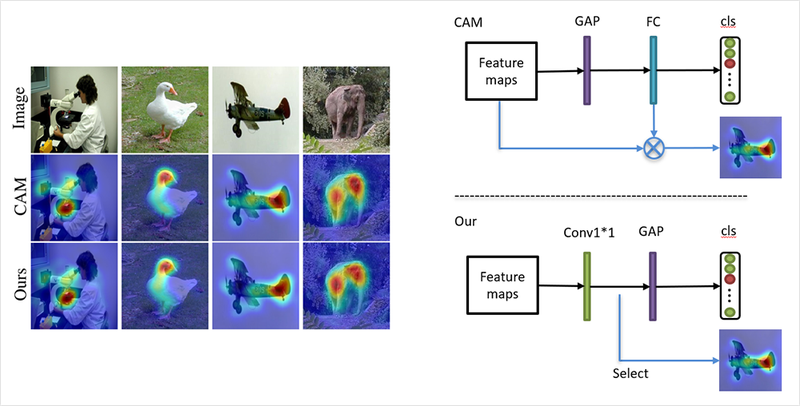